# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## I AM USING PYTHON 3.7

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [10]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
# display(data.head(n=1))
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [60]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_less_than_50k = data[data['income'] == '<50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))
print("Individuals making less than $50,000: {}".format(n_less_than_50k))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%
Individuals making less than $50,000: 0


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/Users/q493551/PhD/Projects/UDACITY/1_SupervisedLearning/Project/DSND_Term1-master/projects/p1_charityml/visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


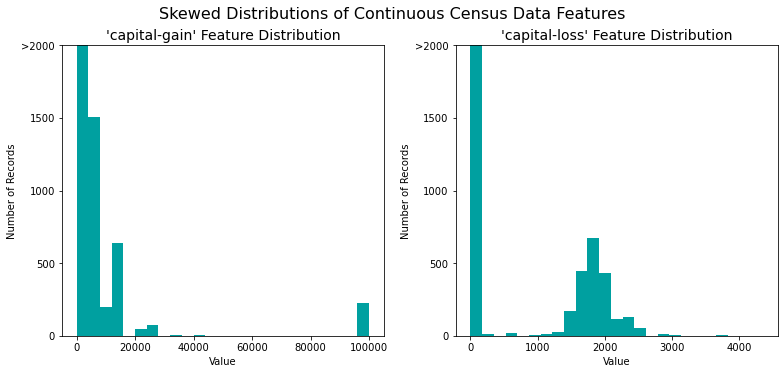

In [12]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

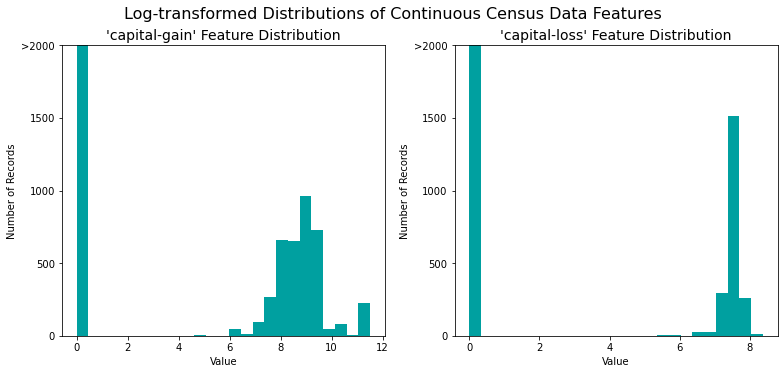

In [13]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [14]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [15]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 0 if x == "<=50K" else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)
# features_final

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [16]:
# Import train_test_split
# APARENTLY, cross_validation HAS BEEN DEPRICATED IN MY ENVIRONMENT
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [17]:
Total_number_predictions = income.count()
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP/Total_number_predictions
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print('accuracy = ', accuracy, ' recall =', recall, ' precision =', precision)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

#Trying with the library to compare values
from sklearn.metrics import fbeta_score
naive_prediction = [1] * Total_number_predictions
Fbeta_score = fbeta_score(income, naive_prediction, beta=beta)
print('Fbeta socore = ', Fbeta_score)

# Print the results 
print('Here are the accuracy and the fscore for beta = 0.5 (leaning towards precision). They are similar, but the f-score is better for the naive classifier.')
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

accuracy =  0.2478439697492371  recall = 1.0  precision = 0.2478439697492371
Fbeta socore =  0.29172913543228385
Here are the accuracy and the fscore for beta = 0.5 (leaning towards precision). They are similar, but the f-score is better for the naive classifier.
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

#### Answer question 2

All of the algorithms allow for classification, which is the task at hand. 

About the data (not considering the problems solved already for skewness etc.), we know that most of the data contains people that earn less than 50K (24.78% more than 50K, somewhat an imbalance outcome), and that there are 103 features and around 45K records.
We can say that there are not too many records for training, that the amount of features is considerable, and that the  outcome is skewed towards one type (under 50K).

Note: Points that do not have a reference use this Udacity course as a source or the sklearn library for each classifier. E.g. for naive bayes: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I also followed this offical cheat sheet for sciklearn as a rule of thumb: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.htmlfound.

**Looking at the diagram, according to the number of records (45K < 100K) and the fact that we are not classfying text, our first choice of algorithms will be classifiers based on SVM, KNN and Ensemble methods. We will look into other references and cross-validate this decision**

We will go with general SVCs and skip the linear SVC as suggested, we have to try 3 in this assignment after all.

Also, these set of articles from stanford are used as reference: https://nlp.stanford.edu/IR-book/html/htmledition/choosing-what-kind-of-classifier-to-use-1.html

''If you have fairly little data and you are going to train a supervised classifier, then machine learning theory says you should stick to a classifier with high bias, as we discussed in Section...''

We have around 45K records, this is not a huge amount of data. As a matter of fact, it is below the bound of the sciklearn in the classification diagram (less than 100K samples). **Thus, accoridng to the literature form stanford, we should pursue classifiers with high bias.** Also, for a pre-selection, computation time and scalability of the algorithm are not an issue for this very task at hand. 

So we must answer the question, do the 3 methods aforementioned have high bias (tendency to underfit)? 

According to: https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/ from a repuatble author: https://www.linkedin.com/in/jasonbrownlee/

''Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.''

This goes in opposition to what the sciklearn diagram suggested.

So what to do? Like in the ML, I will do a trade-off between the references. Out of the 3 models previously suggested (SVM, KNN and Ensemble methods), only KNN and SVM algorithms, can increase their bias by tuning  K (downwards) and C (upwards) respectively. Because in the case of KNN the K would be lo (2 types), that will give it low high bias. 

**Thus, we will dicard Ensemble methods and choose KNN and SVMs for our experiments. Reconciling both references from Stanford and sciklearn.** To my recollection, I do not remember that we learned KNN in the course, which might be indicatove of not using it, but that way I can also lern something new. 

This leaves one classifier left for testing. Looking at the high bias algorithms, logistic regression has low bias, which might make it a good candidate according to that reference. According to stanford, GaussianNB has also high bias and this explains why gaussianNB is considered immune to high variance: https://www.quora.com/Why-are-Naive-Bayes-classifiers-considered-relatively-immune-to-overfitting

Because we have a large amount of categiral features, and GaussianNB is known for being good for those cases, **we will choose GaussianNB our 3rd candidate.** 

These are the classification alforithms in depth:

Point 4 is complemented with all the above. 

### SVM
1. It is used to classify text and hypertext, images, hand-written characters, and has been widely applied in medical use cases.
2. Effective in high dimensional spaces, still effective in cases where number of dimensions is greater than the number of samples, uses a subset of training points in the decision function (called support vectors), so it is also memory efficient, and it is versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
3. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is slow to compute.
4. **Inherently it has a nob for increasing or lowering bias. Thus, the assumption from stanford that we need a low bias algorithm can be easily changed if we see it does not hold true with this number of records and features.** 

Additional references: 1, https://en.wikipedia.org/wiki/Support-vector_machine#Applications. 2,3: https://scikit-learn.org/stable/modules/svm.html. 

### KNN
1. (i) Credit ratings — collecting financial characteristics vs. comparing people with similar financial features to a database. (ii) hould the bank give a loan to an individual? (iii) In political science — classing a potential voter to a “will vote” or “will not vote”, or to “vote Democrat” or “vote Republican”.
2. Very little training time. Good with multiclass settings. Simple to implement. 
3. KNN does well when there are more classification types, we might not leverage it so much with just 2 types. While training is fast, it is computationally expensive in testing phase which is impractical in industry settings. KNN can suffer from skewed class distributions (which is our case, we have an imbalance outcome). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.
4. **After researching KNN more deeply (see point 3), it seems that it is not going to be a great algorithm for the task at hand. it is good for unsupervised learning and when there are multiple classes makes more sense than wasting potential on just 2 classes.**

Additonal references: 1. https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7. 2, 3. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/, 

**We will use instead logistic regression, which was the candidate not selected before in the dichotonomy between log. regression and GaussianNB. Besides, there are only 2 categories in the outcome, which is very appropiate for logistic regresison according to the course**

### Logistic regression
1. Spam Detection, Credit Card Fraud, and tumour Prediction.
2. Logistic Regression performs well when the dataset is linearly separable. Logistic regression is less prone to over-fitting but it can overfit in high dimensional datasets. You should consider Regularization (L1 and L2) techniques to avoid over-fitting in these scenarios. Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative). Logistic regression is easier to implement, interpret and very efficient to train. 
3. Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. Most of the time data would be a jumbled mess. If the number of observations are lesser than the number of features, Logistic Regression should not be used, otherwise it may lead to overfit. Logistic Regression can only be used to predict discrete functions. Therefore, the dependent variable of Logistic Regression is restricted to the discrete number set. This restriction itself is problematic, as it is prohibitive to the prediction of continuous data.
4. It has low bias and it is fast to compute.

References: 1 https://magoosh.com/data-science/4-logistic-regressions-examples/. 2. 3 http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of.html

### Gaussian Naive Bayes (GaussianNB)
1. Google (and most certainly other email providers), use this classifier to separate spam from not spam. It is also known to be applied to Real time prediction, multi class predictions, and recommendation systems.
2. It performs well when the number of features is very large, plus it performs well when there are many categorial values. As the features of the dataset to be studied would be words, and because emails have a great variaty of them,  GaussianNB is goof for classifying emails. It also is unaffected by the presence of irrelevant features. It is also a simple algorithm that does not need much tunning. Furthermore, the ratio of computation time vs. data is very low. And the last positive aspects is that it rarely overfits and it works well when there are multiple classes to predict. 
3. One of the weaknesses is that it makes the assumption that the events included are independent (hence the name od naive). This, however, introduces a small error (in the course shown cases).  There is literature that does not consider GNB a good classifier ad it is inherentily assuming independence of events.
4. Given that there are 103 features (most of which were categorical before), which from my experience in this course could be considered large, I therefore think this is a good model to use for classification. There is not too much data, and that has shown to serve well for Gaussian classification. It also has low bias, which is a wanted property for a low amount of training data. It is fast to compute as well.

Additional eferences: 1. https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used. 1, 3 and 4. https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf. 3. https://www.quora.com/Why-is-naive-Bayes-a-decent-classifier-but-a-bad-estimator


## Thus, for lack of better information until testing is done, I choose: SVM, Logistic regression, and GaussianNB.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [21]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1)
        
    # TODO: Compute F-score on the test set which is y_test
    # I use beta = 0.5 as we are focuing on precision
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.
LogisticRegression trained on 36177 samples.
GaussianNB trained on 362 samples.
GaussianNB trained on 3618 samples.
GaussianNB trained on 36177 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 362 samples.
SVC trained on 3618 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.


/Users/q493551/PhD/Projects/UDACITY/1_SupervisedLearning/Project/DSND_Term1-master/projects/p1_charityml/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


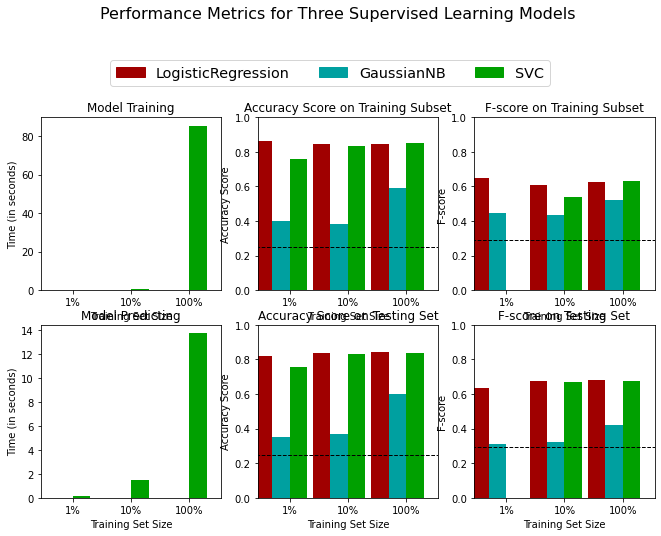

In [26]:
# TODO: Import the three supervised learning models from sklearn
# We use GaussianNB and not multinominalNB because there is a good amount of continuous features
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=0)
clf_B = GaussianNB()
clf_C = SVC()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(round(0.1 * samples_100))
samples_1 = int(round(0.01 * samples_100))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
Gaussian_SVC_Logistic_results = {}
Gaussian_SVC_Logistic_results = results

## For the sake of learning, I execute the same code with the algorithms I did not choose and that I overlooked. Ensemble methods was recommended by the diagram from sciklearn, but having low bias, I decided not to use them. Let us see if the decision was adecuate.

AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 36177 samples.
KNeighborsClassifier trained on 362 samples.
KNeighborsClassifier trained on 3618 samples.
KNeighborsClassifier trained on 36177 samples.


/Users/q493551/PhD/Projects/UDACITY/1_SupervisedLearning/Project/DSND_Term1-master/projects/p1_charityml/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


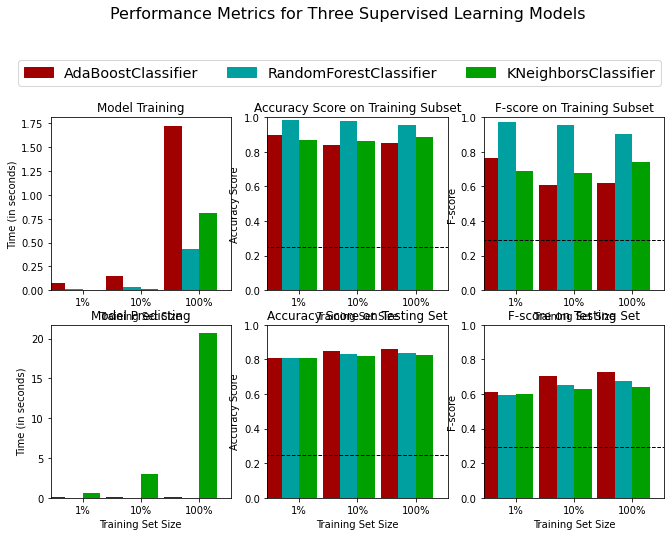

In [57]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier()
clf_B = RandomForestClassifier()
clf_C = BaggingClassifier()
clf_C = KNeighborsClassifier()


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(round(0.1 * samples_100))
samples_1 = int(round(0.01 * samples_100))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
ada_randomf_bagging_results = {}
ada_randomf_bagging_results = results

GradientBoostingClassifier trained on 362 samples.
GradientBoostingClassifier trained on 3618 samples.
GradientBoostingClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.
SGDClassifier trained on 362 samples.
SGDClassifier trained on 3618 samples.
SGDClassifier trained on 36177 samples.


/Users/q493551/PhD/Projects/UDACITY/1_SupervisedLearning/Project/DSND_Term1-master/projects/p1_charityml/visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


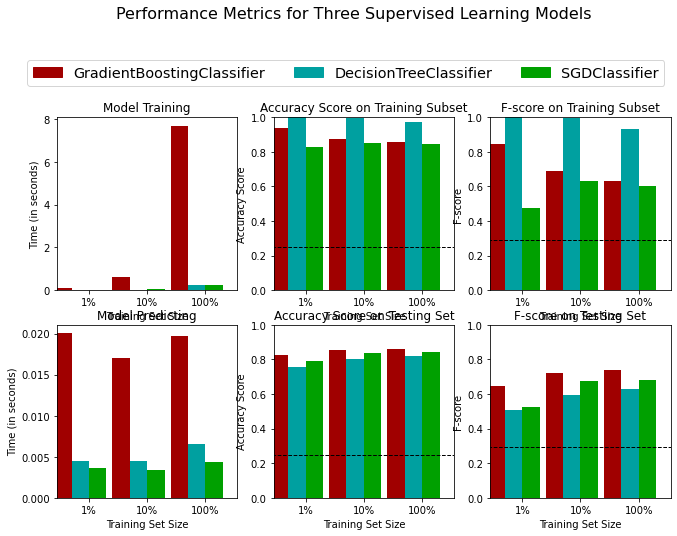

0.2478439697492371 0.29172913543228385


In [33]:
# TODO: Initialize the three models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier()
clf_B = DecisionTreeClassifier()
clf_C = SGDClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(round(0.1 * samples_100))
samples_1 = int(round(0.01 * samples_100))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
gradientboosting_decisiontree_SGD_results = {}
gradientboosting_decisiontree_SGD_results = results

### As it is hard to look into separate plots, I printed all the relevant metrics for comparison after running all the classifers together.

In [58]:
# TODO: Initialize the three models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier()
clf_B = RandomForestClassifier()
clf_C = BaggingClassifier()
clf_D = GradientBoostingClassifier()
clf_E = DecisionTreeClassifier()
clf_F = SGDClassifier()
clf_G = LogisticRegression(random_state=0)
clf_H = GaussianNB()
clf_I = SVC()
clf_J = KNeighborsClassifier()

clfs = [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I, clf_J]

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(round(0.1 * samples_100))
samples_1 = int(round(0.01 * samples_100))

# Collect results on the learners
results = {}
for clf in clfs:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
ALL_results = {}
ALL_results = results

AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 36177 samples.
BaggingClassifier trained on 362 samples.
BaggingClassifier trained on 3618 samples.
BaggingClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 362 samples.
GradientBoostingClassifier trained on 3618 samples.
GradientBoostingClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.
SGDClassifier trained on 362 samples.
SGDClassifier trained on 3618 samples.
SGDClassifier trained on 36177 samples.
LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.
LogisticRegression trained on 36177 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GaussianNB trained on 362 samples.
GaussianNB trained on 3618 samples.
GaussianNB trained on 36177 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 362 samples.
SVC trained on 3618 samples.


/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
KNeighborsClassifier trained on 362 samples.
KNeighborsClassifier trained on 3618 samples.
KNeighborsClassifier trained on 36177 samples.


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Answer Question 3


Let us comment on the following 3 metrics before answering the question completely. According to the results from the initially chosen algorithms (SVM, GaussianNB, and Logistic Regression), there are the conclusions about these metrics:

1. F score on the testing when 100% of the training data is used. The Fscore is very similar for logistic regression and SVC, both betwen 60% and 70%. It is hard to say which one is better, thus we look in the next one (GaussianNB did significantly worse than the other two)
2. prediction/training time. There is a clear winner in this aspect, SVC takes almost 14 s to execute on the whole testing set, while logistic regression is extremely fast. Thus we can conclude that we would pick Logistic regresison. let us see point 3.
3. This point has been discussed earlier in answer 1. Logistic regression is appropiate for 2 class calssification and SVM can also work. Thus with this point it is hard to judge which one is better. 

**In conclusion, ouf the three classifiers, Logistic regression does a better job at classification, mainly because of the computing time.** 



**Nonetheless, let us do some exploration of the other methods. I excuted also the others and here we can see printed the most important metrics. If my hypothesis were not correct, then there should be a better method. If there is, we will pick it instead of Logistic regression and reason why my initial intuition was wrong**

In [59]:
# We print the different metrics for all the tested algorithms.

for clf in clfs:
    clf_name = clf.__class__.__name__
    print(clf_name, ' Testing time = ', ALL_results[clf_name][2]['pred_time'], ' Fscore = ', ALL_results[clf_name][2]['f_test'])
    

AdaBoostClassifier  Testing time =  0.10589385032653809  Fscore =  0.7245508982035928
RandomForestClassifier  Testing time =  0.027359962463378906  Fscore =  0.6701554720048776
BaggingClassifier  Testing time =  0.042406320571899414  Fscore =  0.6765201864894357
GradientBoostingClassifier  Testing time =  0.020003080368041992  Fscore =  0.7395338561802719
DecisionTreeClassifier  Testing time =  0.006457090377807617  Fscore =  0.6293511556669451
SGDClassifier  Testing time =  0.0036139488220214844  Fscore =  0.6823451473998012
LogisticRegression  Testing time =  0.0045549869537353516  Fscore =  0.6831652282416554
GaussianNB  Testing time =  0.010759830474853516  Fscore =  0.4208989595756056
SVC  Testing time =  13.22416067123413  Fscore =  0.6744771706996605
KNeighborsClassifier  Testing time =  19.641422033309937  Fscore =  0.6391641322476208


#### About testing time:
The slowest is the SVC. 
The fastest is the SGDClassifier. 
Logistics regression comes seond with respect to speed. So that is very good. 
These last two are very close to each other. 
Other classifiers tha perdform very well time-wise are the decision tree classifier, and the GaussianNB. 
Ensembling methods do worse but it is not such a big difference practically speaking. 
The best ensemble method for time is the GradientBoostingClassifier.

Excluding the SVC, the rest of algorithms are good with respect to time. So let us decide with the next metric.

#### About testing fscore:
**The worst performing classifer is GaussianNB. My intuition there was wrong. I learn form this that we should limit its usage for words as seen in the course. Mane categorial features. Perhaps the continuous features made it very bad.**

As we mentioned, the difference betwen logistic regression and SVc were minimal (Fscore  logistics=  0.6831652282416554 vs Fscore SVC =  0.6744771706996605). But even logistic regression is better. The SGDClassifier is very similar, yet slightly worst. We chose well not to use KNN in the end, as the computation time is even longer than the one from SVC and the Fscore is worse than Logistic regression. 

Decision trees, random forest, and bagging perform slightly worse than the SVC and logistic regression. So I was right there but not by much, however, the best classifier is the Gradientboost classifier and the adaboost, which I completely overlooked due to the statement that they have low bias and that this dataset is not too large.

**I conclude that my assumption of having a small amount of records was wrong, otherwise (according to the stanford reference), a higher bias algorithm would perform better. The diagram from sciklearn indicated that if linear SVC and KNN failed, one must use either SVM or Ensemble methods. I chose SVM because you can tune bias vs variance, which might perform better if we do that, but practically it seems that ensemble methods do better. The best classifier is the GradientBoostingClassifier. We will use it in the rest of this exercise.** 

### Ensemble methods: GradientBoostingClassifier
Similar to adaboost, but using gradient descent.
1. A great application of GBM is anomaly detection in supervised learning settings where data is often highly unbalanced such as DNA sequences, credit card transactions or cybersecurity.
2. Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression.
3. GBMs are more sensitive to overfitting if the data is noisy. Training generally takes longer because of the fact that trees are built sequentially. GBMs are harder to tune than random forests. There are typically three parameters: number of trees, depth of trees and learning rate, and each tree built is generally shallow.
4. It is highly adaptable to the situation. Even though literature says that it tends to overfit (that is why I did not take it in the beginning), it did not happen. Thus, we select this method (aside form the fact that we have shown that performs better), for its flexibility.

References: 1, 2, 3, 4 https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

### Answer: 4

I will first explain ensemble methods, then boosting, and then gradient boost classifer. 
Boosting is a subcategory of ensemble methods, and gradient boosting is a subcategory of boosting.

We have to go to 3 paragraphs because this classifier has 3 things to explain, however, the bolded sentences might be a good summary.

So first, what are ensemble method?

The idea behind enesemble methods is to combine models and average their predictions to create an ultimate better model. The perfect model does not exist, that is why we sometimes must combine models. Some are very rigid and cannot adapt well to the data (high vs low bias) so you would have very lousy predictions, and others are vey flexibile and essentially copy the data they are trained on (low vs high variance), which it will not help you to predict new values. Like memorising for a test without uderstanding, this is not helpful. By combining models, we find a trade-off between these 2 problems. **This is the major quality of ensembling methods, combining worse models to make a better one.**

Second, what is boosting?

So, within esemble methods, there is a category that has shown better results. These are the boosting methods.
We have said that we combine models, let us call them weak learenrs, to make better ones. In boosting, we implement a one weak learner after another, sequentially. So we have a sub-set of data (we have picked randomly from a bigger set), and we train this first weak model on it. Afterwards, we check the errors it has made in the predicitons. Knowing these errors, we make the next weak learner focus on fixing them (incorrected classified points become more important and make the next weak learner to gravitate towards them). We do thos multiple times. Once we are done, we give a weight to each weak model depending on how well they have performed their individual predicitons. After giving each a weight, we sum the weights to obtain the last and best model. The weights will be positive or negative depending on whether the classifer identifies as one type or another. Furthermore, the types can be represented in space (imagine e.g. a 2D grid). So this weak models provide a +/- weight to different areas. Summing the weights on these areas will yield a final +/- value, and depending on that, points falling on one or the other are will be of one type or another. 
**Training is building these areas, and prediciting is plotting a new point in this space and see on which area it lands. Depending on it, it will be one or the other type.**
**The major quality of boosting is that it comabines weak learners sequentially, one improving upon the mistakes of the previos one.**

Third, what is gradient boosting?

Within boosting, we have adaptive and gradient boosting. Gradient boosting has shown better results, so we have decided to use it.  
How adaptive boosting works is explained in the previous paragraph. It was the first type of boosting created and it is intuitive. Gradient boosting is an improved model in boosting. It turns out, that researchers found that ada boosting is a specific case within a more general form, this general form can be built with the so called Gradient boosting. Gradient boosting is more adaptable to the data and thus usually provides better results.
Gradient boosting however works differently. While adaboost uses an accuracy-based metric to give weights to the missclassified points so the next weak learner focuses on them (mind that these are not the weaks of the weak learner, but the points on which the weak learner is beeing trained), gradient boosting utilizes a mathematical technique called gradient descent to calculate these weights. This mathematical technique is known to provide good empirical results and as we see in this case, better than adaboosting. Lastly, gradient descent is a technique that takes little steps on an error function with the aim to minimize the error. So in practice, after each weak learner is trained, gradient descent is use to check in which direction should we change the weight of the points to minimize the error.


References:
This udacity course and http://uc-r.github.io/gbm_regression.
ada vs boosting https://datascience.stackexchange.com/questions/39193/adaboost-vs-gradient-boosting https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [53]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate': [0.1, 0.5, 1], 'n_estimators': [20, 25, 30]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
best_clf

/usr/local/anaconda3/envs/Datascience/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8633
Final F-score on the testing data: 0.7393


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.8630      |     0.8633      |
| F-score        |       0.7395      |     0.7393      |


### Answer 5


The optimized model is better than the unoptimized model in accuracy and worse in Fscore, but the difference is neglibable. So ther has not been much improvement.
The chosen parameters are: for learning rate 0.5 and for the number of weak learners 25.
I tried with learning rates of 0.6 and it keeps choosing 0.5. Thus, improvements are very slight and with low impact as we see that the scores are very steady.

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
These were he naive predictor, clearly we have improved our estimation substantially with respect to this benchmark.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

#### Answer 6

My intuition tells me that the level of profession, workclass, education, age, and capital gain (in this order) are the most important fetures.

I think there are great salary differences between professions. Perhaps in more social oritented countries that is not the case though. The workclass falls in the same idea as the previous one more or less. Depending on the level of education, your starting salary is higher or lower by several thousands of monetary units. Also, the more senior you are, the more experience you have and thus you earn more. Lastly, if your investments are doing well, that will make your income go high.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

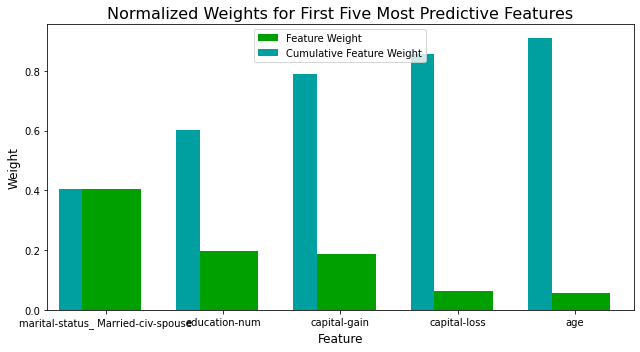

In [54]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# We were already using an algorithm with this feature

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = None

# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

#### Answer 7

**By looking at the data, we have marital status, education number, capital gain, capital loss and age.**
Interestingly enough, preofession and workclass does not play a role. I got right education, as well as capital gain and age. however the weight of age is very low. 
The big surprise for me is te marital status. But thinking back it makes sense. People with more money usually are in a better condition to form a family. There is a correlation there.
It is fun to se that only the first three features form almost 80% of the prediction.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [55]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8633
F-score on testing data: 0.7393

Final Model trained on reduced data
------
Accuracy on testing data: 0.8572
F-score on testing data: 0.7235


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

#### Answer 8

It is amazing to see that they stay the same on the Final Model trained on full data. 
If time was a factor the smart thing to do is to use only the top important features when they together explain more than 50% of the data. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.